In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')
                                      

In [57]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [58]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Our target variable is Rings and remaining are the inputs.
its a classification problem.


# Preprocessing + Training 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


sex is object type.
There is no missing value.

In [60]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns.

In [61]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [96]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

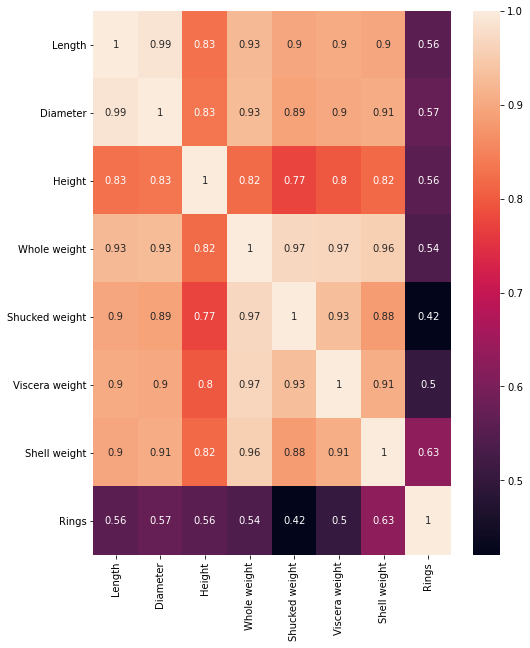

In [62]:
plt.figure(figsize=(8,10))
sns.heatmap(df.corr(),annot=True)
plt.show

Rings is highly negatively correlated with Shucked weight.


In [63]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The mean is more than the median in Whole weight,Shucked weight and Viscera weight

In [64]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [65]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [130]:
encoded_data = pd.get_dummies(df)
df=encoded_data
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# plotting outliers

Length               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Viscera weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.257857,0.125;0.110714x0.343182)
Sex_F                AxesSubplot(0.390714,0.125;0.110714x0.343182)
Sex_I                AxesSubplot(0.523571,0.125;0.110714x0.343182)
Sex_M                AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

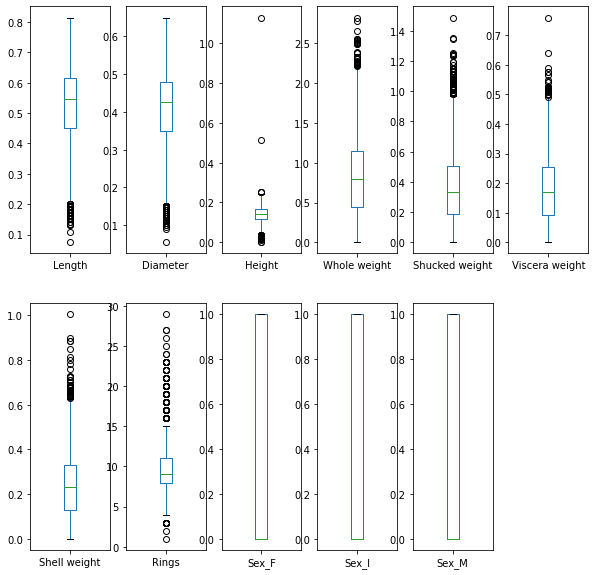

In [131]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

so many outliers are presents.

In [132]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

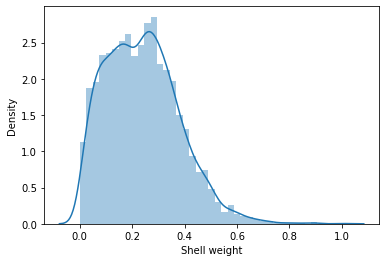

In [133]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

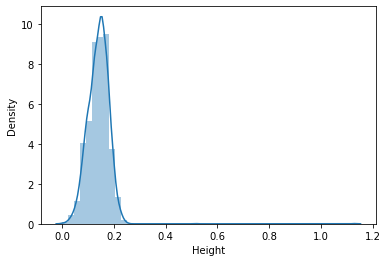

In [134]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

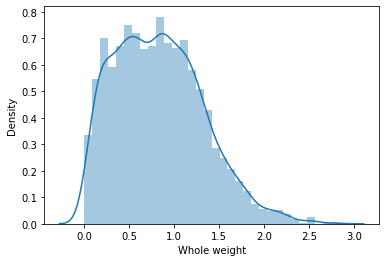

In [135]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Length', ylabel='Density'>

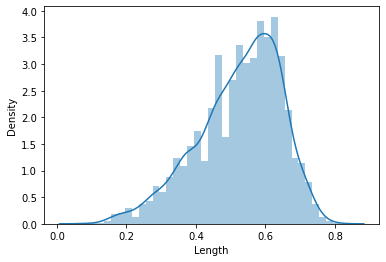

In [136]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

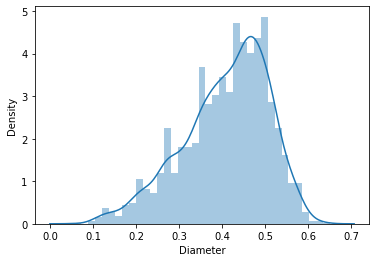

In [137]:
sns.distplot(df['Diameter'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

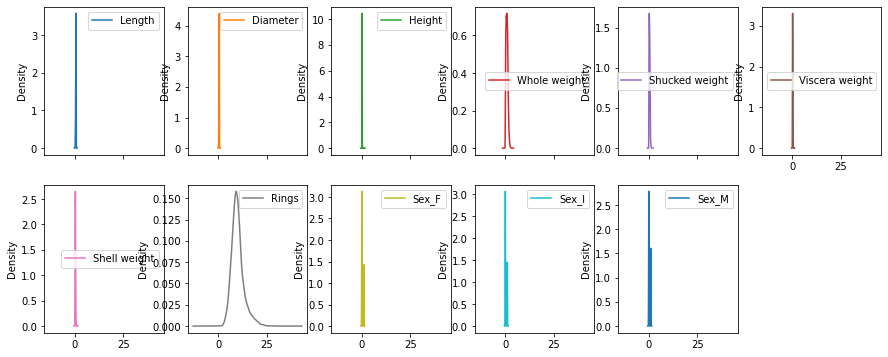

In [138]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

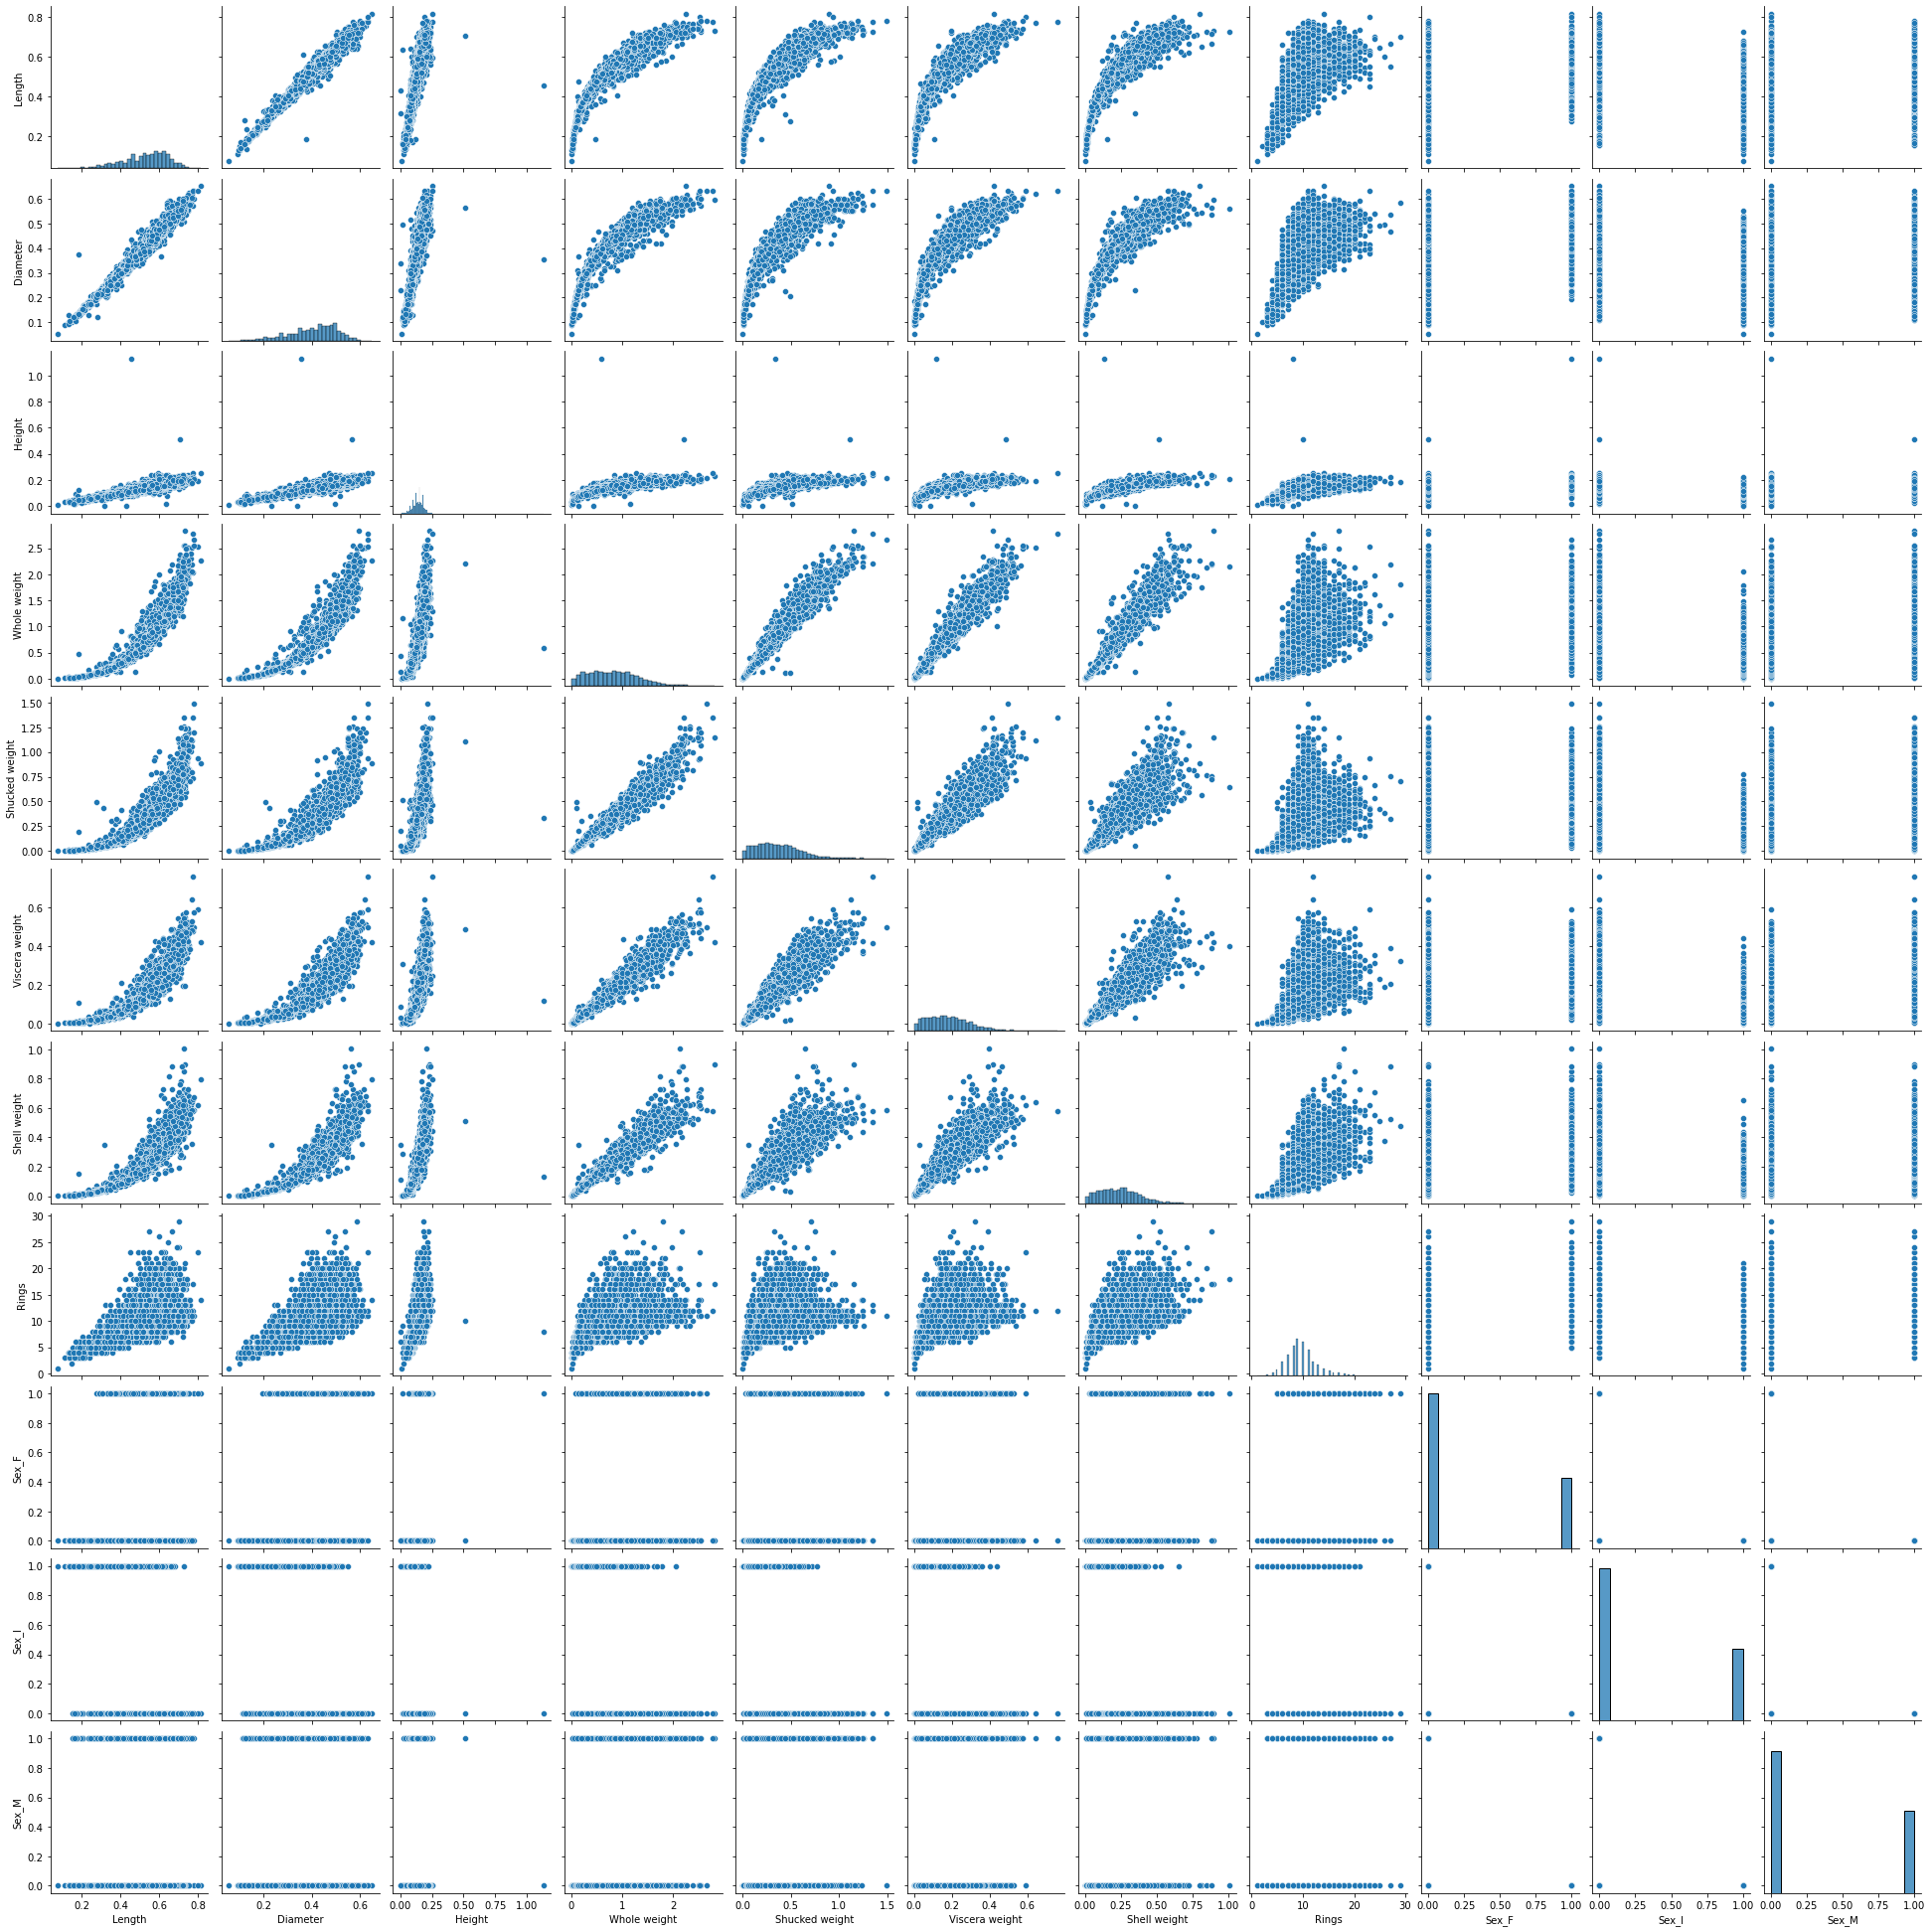

In [139]:
sns.pairplot(df)

High Skewness present.

In [86]:
#data_new=df.drop(['Sex','Rings'],axis=1)

# Removing outliers

In [145]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.67483383, 0.68801788,
        1.31667716],
       [1.44898585, 1.439929  , 1.18397831, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.05003309, 0.12213032, 0.10799087, ..., 1.48184628, 0.68801788,
        0.75948762],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.84118198, 0.77718745, 0.25067161, ..., 1.48184628, 0.68801788,
        0.75948762],
       [1.54905203, 1.48263359, 1.32665906, ..., 0.67483383, 0.68801788,
        1.31667716]])

In [146]:
df_new= data[(z<3).all(axis=1)]

In [147]:
df_new.shape

(4027, 7)

In [148]:
df.shape

(4177, 11)

Not much data loss.

# Removing the skewness

In [150]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [151]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [152]:
x

array([[-0.68445079, -0.54337947, -1.15893308, -0.57513463, -0.54086524,
        -0.68803217],
       [-1.4117394 , -1.40113174, -1.28040611, -1.35404959, -1.31131805,
        -1.33285416],
       [-0.0462191 ,  0.03716259, -0.12830502, -0.18449788, -0.36270513,
        -0.24037305],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286,  0.85343427,  0.90189694,
         1.08965131],
       [ 0.92606411,  0.8377131 ,  0.28606972,  0.69738476,  0.92415296,
         0.87642835],
       [ 1.9719402 ,  1.85550496,  1.62558351,  2.14577532,  2.31446634,
         1.73214622]])

In [153]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.68445079, -0.54337947, -1.15893308, -0.57513463, -0.54086524,
        -0.68803217],
       [-1.4117394 , -1.40113174, -1.28040611, -1.35404959, -1.31131805,
        -1.33285416],
       [-0.0462191 ,  0.03716259, -0.12830502, -0.18449788, -0.36270513,
        -0.24037305],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286,  0.85343427,  0.90189694,
         1.08965131],
       [ 0.92606411,  0.8377131 ,  0.28606972,  0.69738476,  0.92415296,
         0.87642835],
       [ 1.9719402 ,  1.85550496,  1.62558351,  2.14577532,  2.31446634,
         1.73214622]])

In [155]:
x=df.drop(['Rings'],axis=1)
y=df['Rings']

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [157]:
x_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
3213,0.555,0.420,0.140,0.8680,0.3300,0.2430,0.2100,1,0,0
4080,0.555,0.430,0.125,0.7005,0.3395,0.1355,0.2095,0,1,0
1891,0.565,0.435,0.145,0.8445,0.3975,0.1580,0.2550,0,1,0
3566,0.575,0.450,0.155,0.8860,0.3605,0.2110,0.2575,0,0,1
3438,0.430,0.335,0.105,0.3780,0.1880,0.0785,0.0900,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2895,0.540,0.415,0.110,0.6190,0.2755,0.1500,0.1765,0,1,0
2763,0.550,0.425,0.135,0.6560,0.2570,0.1700,0.2030,0,1,0
905,0.320,0.240,0.090,0.1575,0.0700,0.0265,0.0425,0,1,0
3980,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,1,0,0


x is our input or feature data and y is output or target data.

In [158]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [160]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.22089314194577353
[[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 55  6  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 60 22 18 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31 50 39 45  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13 36 68 88  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 23 79 98  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 14 41 87  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4 29 49  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 27 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 19 21  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 12 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 

In [129]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=mnb.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.1634768740031898
[[  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0  31   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0  70   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 119   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 165   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 205   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 205   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 146   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0  84   0   0   0   0  

In [161]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=mnb.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.22089314194577353
[[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 55  6  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 60 22 18 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31 50 39 45  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13 36 68 88  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 23 79 98  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 14 41 87  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4 29 49  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 27 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 19 21  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 12 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 

In [162]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.17464114832535885
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  8  3  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  7  8  5  2  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 16 19 16  8  3  1  3  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  7 27 27 28 16  4  6  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2 19 28 35 35 20 10 10  2  1  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  6 19 45 40 40 32  6  5  2  5  1  0  0  2  1  0  0  0]
 [ 0  0  0  0  2  8 23 47 44 35 19  9  4  5  4  4  0  1  0  0  0  0]
 [ 0  0  0  0  0  2 14 36 29 21  9 13  5  4  1  5  1  5  0  1  0  0]
 [ 0  0  0  0  0  3 12 14 11 19  7  8  3  4  0  1  1  1  0  0  0  0]
 [ 0  0  0  0  1  1  4  8  8 17  3  5  3  4  3  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  5  8  8  5  2  4  4  2  1  0  1  0  1  0  0]
 [ 0  0  0  0  0  1  1  0  5  7  2  5  3  1  0  1  0  0  1  1  0  0]
 [ 0  0  0  0 

In [163]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.2240829346092504
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  8  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5  6 12  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 13 25 23  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1 32 42 28  8  4  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 10 38 57 38 18  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 21 53 56 37 21  5  0  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12 36 63 49 34  5  4  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3 21 43 45 26  4  2  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  4 10 15 26 10  9  4  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  8 17 14 14  4  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 13  8  4  8  6  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  5 10  2  0  2  1  1  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  

In [164]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls= Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [169]:
lg=LogisticRegression()

In [170]:
lg.fit(x_train,y_train)

LogisticRegression()

In [171]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [172]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [173]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [174]:
loaded_model = pickle.load(open('model_pickle','rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.23843700159489634


In [179]:
a=np.array(y_test)
predicted=np.array(lg.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,10,9
1,8,9
2,9,7
3,10,9
4,16,9
...,...,...
1249,9,8
1250,7,7
1251,8,9
1252,8,9
